In [1]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import building_dection

/scratch/toml/semester_thesis/pipeline/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_names = []
label_names = []
training_dir = "/scratch/toml/sn7/train"
for location in os.listdir(training_dir):
    label_path = f"{training_dir}/{location}/global_monthly_2018_01_mosaic_{location}_Buildings_cropped.tif"
    label_names.append(label_path)
    # reference TCI image
    image_path = f"{training_dir}/{location}/images/ref/"
    image_names.append(image_path)


In [3]:
with rio.open(image_names[1] + "B01.tif") as src:
        image = src.read(1)
x1 = np.asarray([[1,2,3],[4,5,6]])
x2 = np.asarray([[7,8,9],[10,11,12]])
x = np.concatenate((x1,x2), axis=0)
x, x.shape
os.listdir(training_dir)

['L15-0331E-1257N_1327_3160_13',
 'L15-0357E-1223N_1429_3296_13',
 'L15-0361E-1300N_1446_2989_13',
 'L15-0368E-1245N_1474_3210_13',
 'L15-0434E-1218N_1736_3318_13',
 'L15-0977E-1187N_3911_3441_13',
 'L15-0632E-0892N_2528_4620_13',
 'L15-1014E-1375N_4056_2688_13',
 'L15-0683E-1006N_2732_4164_13',
 'L15-0595E-1278N_2383_3079_13',
 'L15-0544E-1228N_2176_3279_13',
 'L15-0506E-1204N_2027_3374_13',
 'L15-0586E-1127N_2345_3680_13',
 'L15-0457E-1135N_1831_3648_13',
 'L15-0487E-1246N_1950_3207_13',
 'L15-0566E-1185N_2265_3451_13',
 'L15-0387E-1276N_1549_3087_13']

In [4]:
# bands = ["B01","B02", "B03", "B04", "B05", "B06", "B07", "B09","B11", "B12", "B8A", "SCL", "WVP", "AOT"]
bands = ["B02", "B03", "B04", "B08", "WVP", "AOT"]
number_of_images = 2
x = np.zeros((0, len(bands)))
for image_name in image_names[4:number_of_images+4]:
    x_image = building_dection.convert_band_images_to_ndarray(image_name, bands)
    x = np.concatenate((x, x_image), axis=0)
    print(x.shape)

y = np.zeros((0))
for label_name in label_names[4:number_of_images+4]:
    with rio.open(label_name) as src:
        label = src.read(1)
    label = label.flatten().astype(np.uint8)
    print(label.shape)
    print(y.shape)
    y = np.concatenate((y, label), axis=0)

(119360, 6)
(240257, 6)
(119360,)
(0,)
(120897,)
(119360,)


In [5]:
x.shape, y.shape

((240257, 6), (240257,))

In [6]:
# # plot image n and label n in subplots
# n = 2
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(images[n])
# ax[1].imshow(labels[n])
# for i,l in zip(images, labels):
#     print(i.shape, l.shape)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# print info about image_dataset, labels_dataset, X_train, X_test, y_train, y_test
print("image_dataset shape:", x.shape)
print("labels_dataset shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


image_dataset shape: (240257, 6)
labels_dataset shape: (240257,)
X_train shape: (192205, 6)
X_test shape: (48052, 6)
y_train shape: (192205,)
y_test shape: (48052,)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics


model = svm.SVC(kernel='linear') 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the coefficients
print('Coefficients: \n', model.coef_)

# Print the mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))




In [11]:
from cuml import SVC

model_cu = SVC(kernel='rbf', gamma='auto', C=1.0, probability=True, random_state=42) 

model_cu.fit(X_train, y_train)
y_pred = model_cu.predict(X_test)

# Print the coefficients
# print('Coefficients: \n', model_cu.coef_)

# Print the mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

[W] [11:39:57.285426] Random state is currently ignored by probabilistic SVC


AttributeError: coef_

In [9]:
from cuml import LinearSVC

model_cu = LinearSVC() 

model_cu.fit(X_train, y_train)
y_pred = model_cu.predict(X_test)

# Print the mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

Mean squared error: 0.02


In [ ]:
# model_rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)
# model_rbf.fit(X_train, y_train)
# y_pred = model_rbf.predict(X_test)


In [ ]:
# model_poly = svm.SVC(kernel='poly', degree=3, C=1.0)
# model_rbf.fit(X_train, y_train)
# y_pred_poly = model_poly.predict(X_test)

In [ ]:


label_name = label_names[9]
image_name = image_names[9]

image_x = building_dection.convert_band_images_to_ndarray(image_name, bands)

label = label.flatten().astype(np.uint8)

y_pred = model.predict(image_x)
y_pred_rbf = model_rbf.predict(image_x)



NameError: name 'model_rbf' is not defined

In [ ]:
new_label_name = label_name[:-4] + "_predicted.tif"

building_dection.convert_labels_to_raster_file(y_pred, label_name, new_label_name)

In [ ]:
import joblib

joblib.dump(model, 'outputs/svm_model.joblib')
joblib.dump(model_rbf, 'outputs/svm_model_rbf.joblib')
joblib.dump(model_poly, 'outputs/svm_model_poly.joblib')


['svm_model.joblib']

(array([122393.,  14877.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

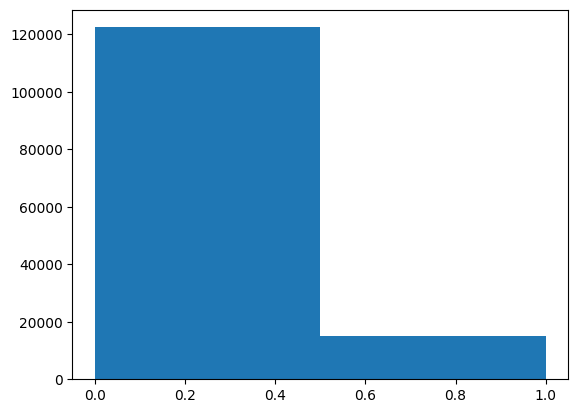

In [ ]:
# plot histogram of y_pred
plt.hist(y_pred, bins=2)